In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense



In [6]:
# Generamos una serie de tiempo ficticia (puedes reemplazarla con tus propios datos)
np.random.seed(42)
n_samples = 1000
time = np.arange(n_samples)
temperature = 20 + 5 * np.sin(2 * np.pi * time / 365) + np.random.normal(0, 2, n_samples)

# Escalamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature.reshape(-1, 1))

# Creamos secuencias de entrada y salida
look_back = 10
X, y = [], []
for i in range(len(temperature_scaled) - look_back):
    X.append(temperature_scaled[i : i + look_back])
    y.append(temperature_scaled[i + look_back])

X, y = np.array(X), np.array(y)



In [7]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Creamos y entrenamos el modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1684
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086
Epoch 16/50
25/25 ━

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


ValueError: x and y must have same first dimension, but have shapes (782,) and (792, 1)

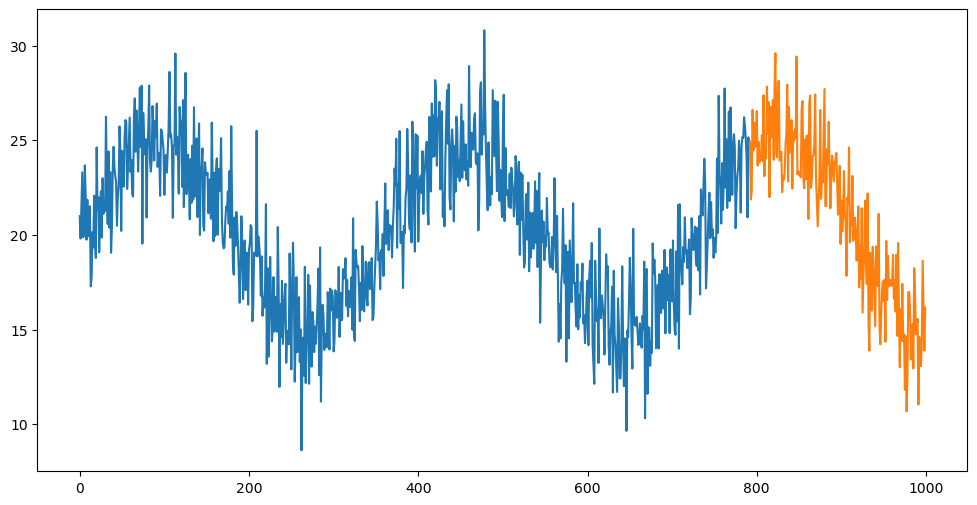

In [8]:
# Realizamos predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertimos la escala para obtener los valores reales
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Graficamos los resultados
plt.figure(figsize=(12, 6))
plt.plot(time[:train_size], temperature[:train_size], label="Datos reales (entrenamiento)")
plt.plot(time[train_size:], temperature[train_size:], label="Datos reales (prueba)")
plt.plot(time[look_back : train_size], train_predict, label="Predicciones (entrenamiento)")
plt.plot(time[train_size + look_back :], test_predict, label="Predicciones (prueba)")
plt.xlabel("Días")
plt.ylabel("Temperatura")
plt.title("Predicción de Temperatura con LSTM")
plt.legend()
plt.show()
